## Self Normalizing Nets

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.rcParams['savefig.dpi'] = 100

out_dir = 'C:/Users/GAO/Jupyter/data/'

In [65]:
# create 1000 data points from a gaussian distribution
data = np.random.randn(1000, 500)

# 10 hidden layers
hidden_layer_sizes = [500]*10

# define nonlinearities
nonlinearities = ['elu']*len(hidden_layer_sizes)

In [66]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale*np.where(x>=0.0, x, alpha*np.exp(x)-alpha)

def relu(x):
    return np.maximum(0, x)

def elu(x):
    return np.where(x>=0.0, x, np.exp(x)-1)

act = {'relu': lambda x: relu(x), 
       'elu': lambda x: elu(x), 
       'selu': lambda x: selu(x)}

In [67]:
num_layers = len(hidden_layer_sizes)

stats = {}
for i in range(num_layers):
    # input layer
    X = data if i == 0 else stats[i-1]
    
    # initialize weights
    fan_in, fan_out = X.shape[1], hidden_layer_sizes[i]
    if nonlinearities[i] == 'selu':
        W = np.random.normal(size=(fan_in, fan_out), scale=np.sqrt(1/fan_in))
    else: # he et. al initialization
        W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2)
    
    # matrix multiply with nonlinearity
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    
    # store result of layer
    stats[i] = H

In [68]:
# mean and std for each layer
layer_means = [np.mean(s) for i,s in stats.items()]
layer_stds = [np.std(s) for i,s in stats.items()]

print('Input layer has mean {} and std {}'.format(np.mean(data), np.std(data)))
for i,s in stats.items():
    print('Hidden layer {} has mean {} and std {}'.format(i+1, layer_means[i], layer_stds[i]))

Input layer has mean 0.002405787216717738 and std 0.9989156035869073
Hidden layer 1 has mean 0.2760133938278945 and std 1.0587864885022122
Hidden layer 2 has mean 0.3318787466306321 and std 1.1485267131335126
Hidden layer 3 has mean 0.36360840215094875 and std 1.2340712163951781
Hidden layer 4 has mean 0.3720605286886526 and std 1.3032182558498127
Hidden layer 5 has mean 0.4456236543888181 and std 1.3928389421843486
Hidden layer 6 has mean 0.4878291359595531 and std 1.4644581440133029
Hidden layer 7 has mean 0.5384595132850437 and std 1.5516430199898246
Hidden layer 8 has mean 0.6181119484325843 and std 1.6467943963953156
Hidden layer 9 has mean 0.6478237216772759 and std 1.74723924193661
Hidden layer 10 has mean 0.7220653143390162 and std 1.8156652595172127


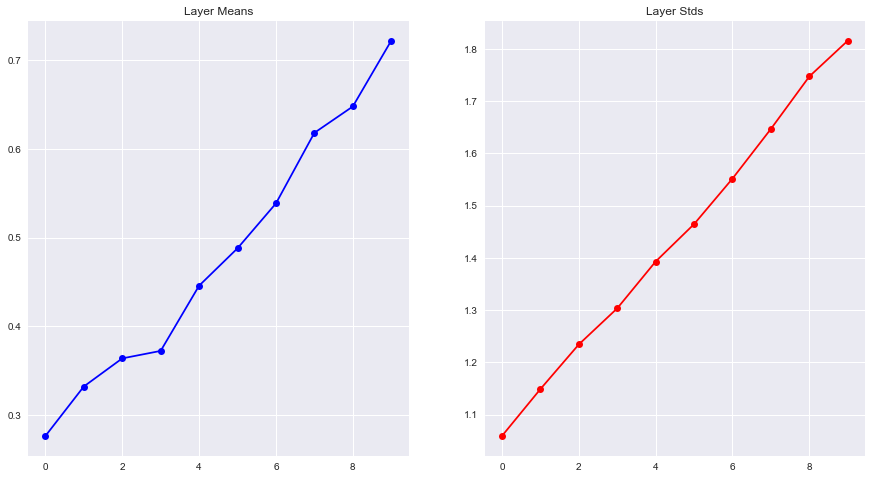

In [69]:
# plot means and stds
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(list(stats.keys()), layer_means, 'ob-')
ax1.set_title('Layer Means')
ax2.plot(list(stats.keys()), layer_stds, 'or-')
ax2.set_title('Layer Stds')
plt.show()

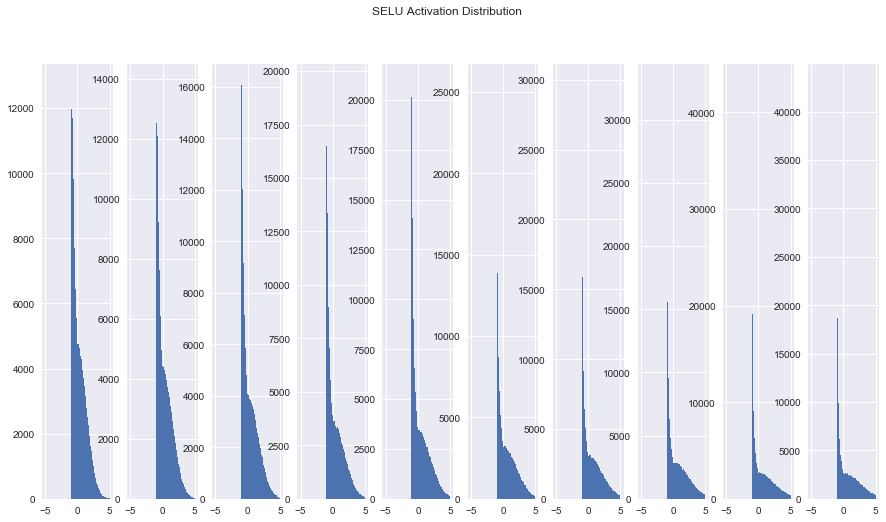

In [70]:
# plot the raw distribution
plt.figure()
for i,s in stats.items():
    plt.subplot(1, num_layers, i+1)
    plt.hist(s.ravel(), 300, range=(-5, 5))
plt.suptitle('SELU Activation Distribution')
plt.savefig(out_dir + 'selu.png', format='png', dpi=200)